In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2.1


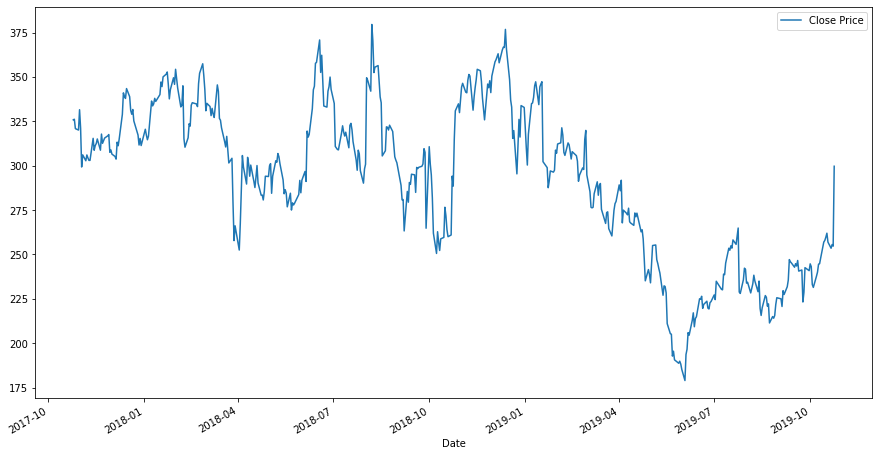

In [ ]:
df = pd.read_csv('TSLA_week1_dif.csv')
df['Date']= pd.to_datetime(df['Date'])
da = [i for i in df["Date"]]
df.set_index("Date", inplace = True)

del df["Unnamed: 0"]
df.plot(y = "Close Price", figsize=(15,8))

2.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

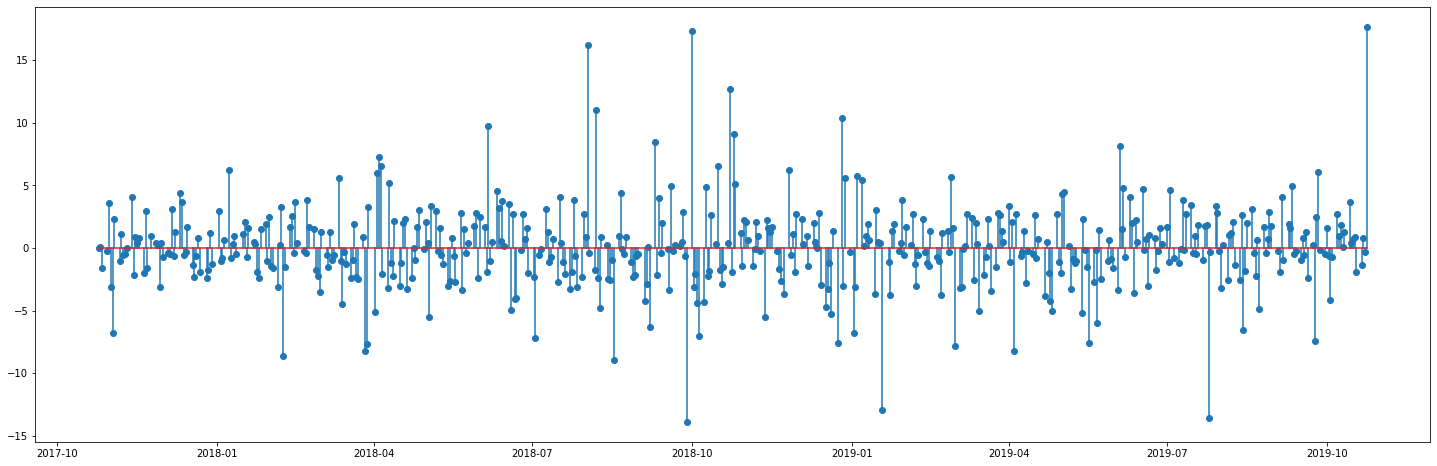

In [ ]:
plt.figure(figsize=(25,8))
plt.stem(da, df["Day_Perc_Change"])

2.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


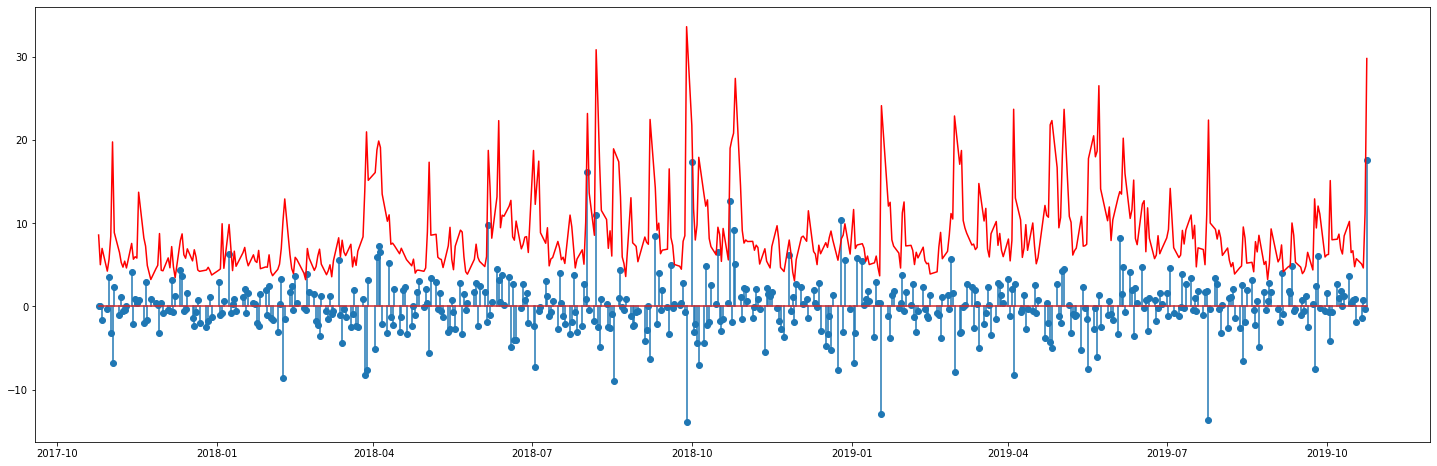

In [ ]:
plt.close()
plt.figure(figsize=(25,8))
plt.stem(da, df["Day_Perc_Change"],label="stem")
plt.plot(df["Total Traded Quantity"]/1000000, label="volume", color="red")
plt.show()

2.4

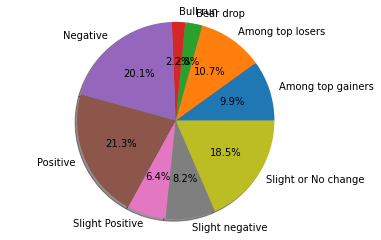

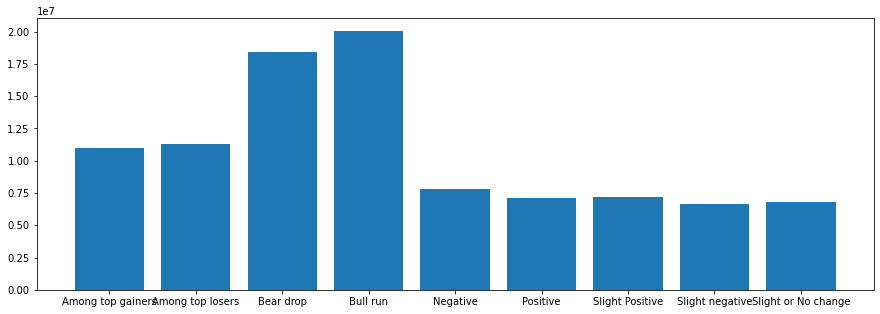

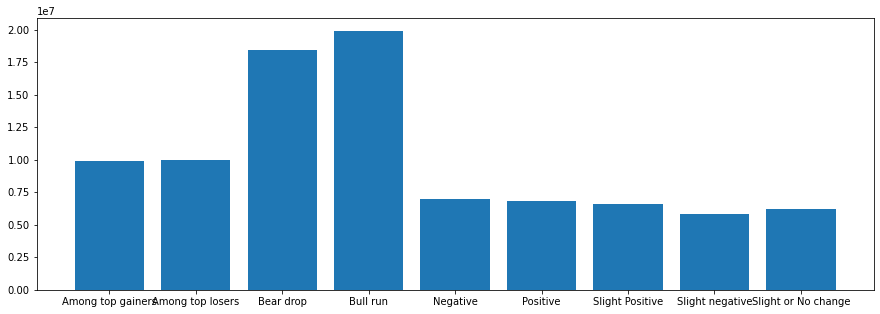

In [ ]:
df1=df.groupby(df['Trend']).count()
labels=df1.index.values
freq=df1['Close Price']

fig1, ax1 = plt.subplots()
ax1.pie(freq,labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
plt.close()

dfm = df.groupby(df['Trend']).mean()
dfme= df.groupby(df['Trend']).median()

plt.figure(figsize=(15,5))
plt.bar(df1.index.values, dfm["Total Traded Quantity"])
plt.show()
plt.close()
plt.figure(figsize=(15,5))
plt.bar(df1.index.values, dfme["Total Traded Quantity"])
plt.show()
plt.close()

2.5

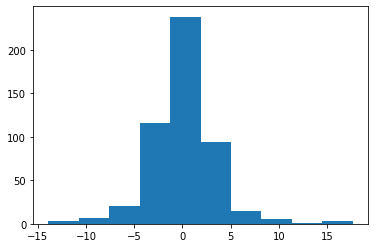

In [ ]:
plt.hist(df["Day_Perc_Change"])
plt.show()
plt.close()

2.6

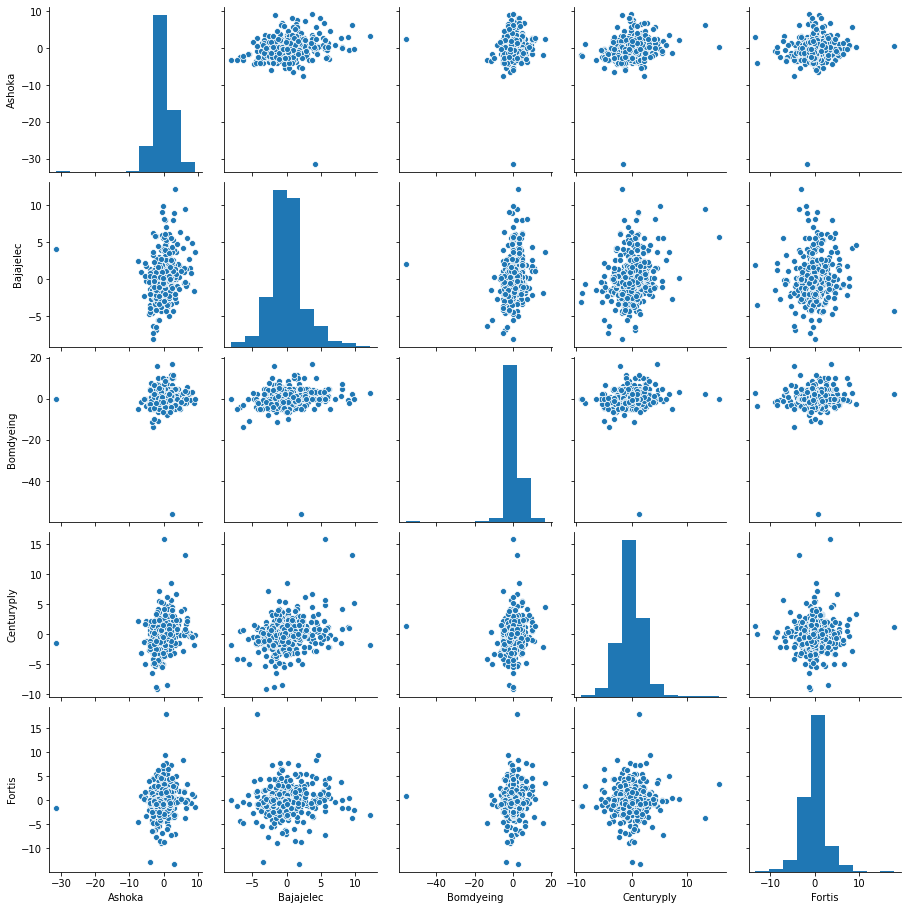

In [ ]:
df5 = pd.DataFrame()
dfa = pd.DataFrame()
df2 = pd.read_csv('ASHOKA.csv')
df5["Ashoka"] = df2[df2["Series"] == "EQ"]["Close Price"]
df1 = pd.read_csv('BAJAJELEC.csv')
df5["Bajajelec"] = df1[df1["Series"] == "EQ"]["Close Price"]
df1 = pd.read_csv('BOMDYEING.csv')
df5["Bomdyeing"] = df1[df1["Series"] == "EQ"]["Close Price"]
df1 = pd.read_csv('CENTURYPLY.csv')
df5["Centuryply"] = df1[df1["Series"] == "EQ"]["Close Price"]
df1 = pd.read_csv('FORTIS.csv')
df5["Fortis"] = df1[df1["Series"] == "EQ"]["Close Price"]
df5.head()

df5p = pd.DataFrame()
df5p["Ashoka"] = df5["Ashoka"].pct_change().dropna()*100
df5p["Bajajelec"] = df5["Bajajelec"].pct_change()*100
df5p["Bomdyeing"] = df5["Bomdyeing"].pct_change()*100
df5p["Centuryply"] = df5["Centuryply"].pct_change()*100
df5p["Fortis"] = df5["Fortis"].pct_change()*100
df5p.head()

sns.pairplot(df5p)
plt.show()
plt.close()

2.7

Text(0.5, 1.0, 'Volatility')

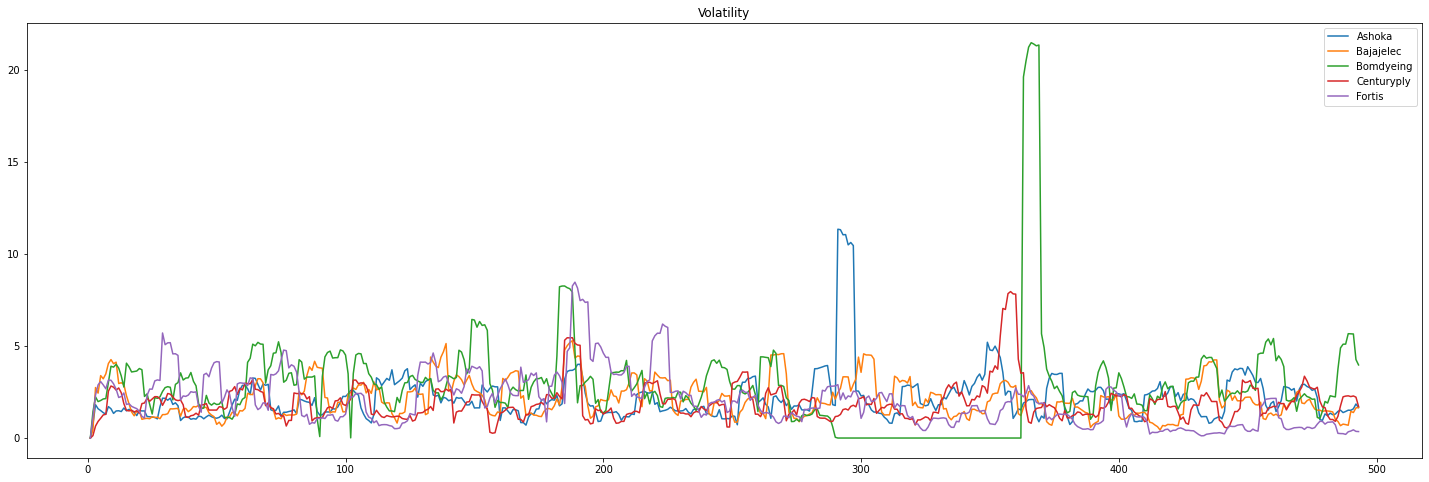

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(df5p[['Ashoka','Bajajelec','Bomdyeing','Centuryply','Fortis']].rolling(7,min_periods=1).std(ddof=0))
plt.legend(['Ashoka','Bajajelec','Bomdyeing','Centuryply','Fortis'])
plt.title('Volatility')

2.8

Text(0.5, 1.0, 'Volatility')

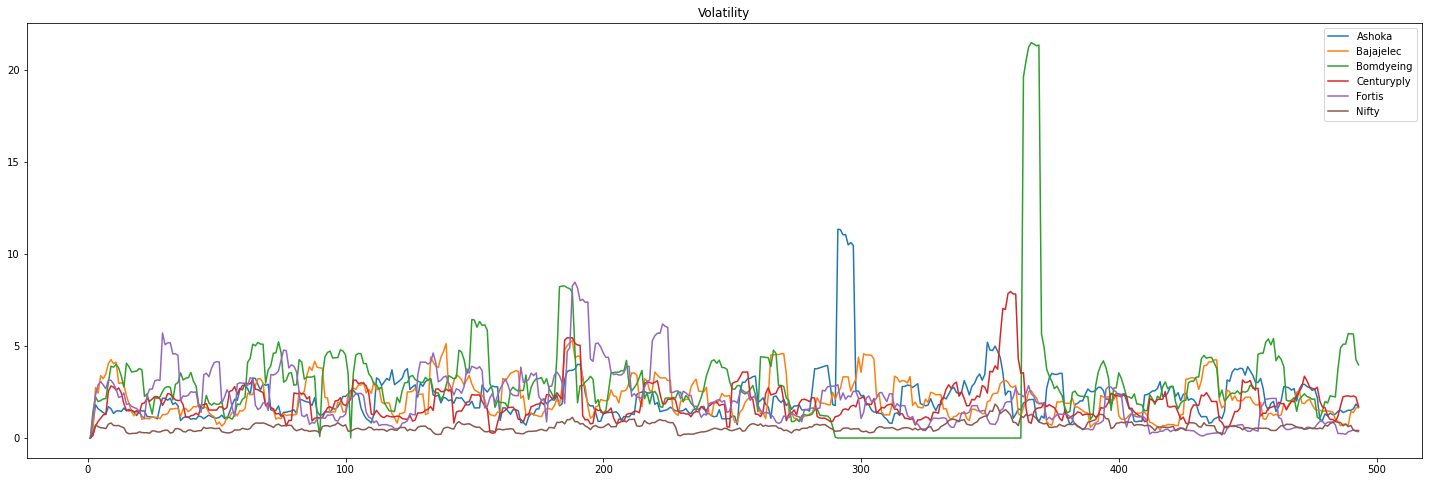

In [ ]:
dfn = pd.read_csv('Nifty50.csv')
df5p["Nifty"] = dfn["Close"].pct_change().dropna()*100
plt.figure(figsize=(25,8))
plt.plot(df5p[['Ashoka','Bajajelec','Bomdyeing','Centuryply','Fortis','Nifty']].rolling(7,min_periods=1).std(ddof=0))
plt.legend(['Ashoka','Bajajelec','Bomdyeing','Centuryply','Fortis','Nifty'])
plt.title('Volatility')

2.9

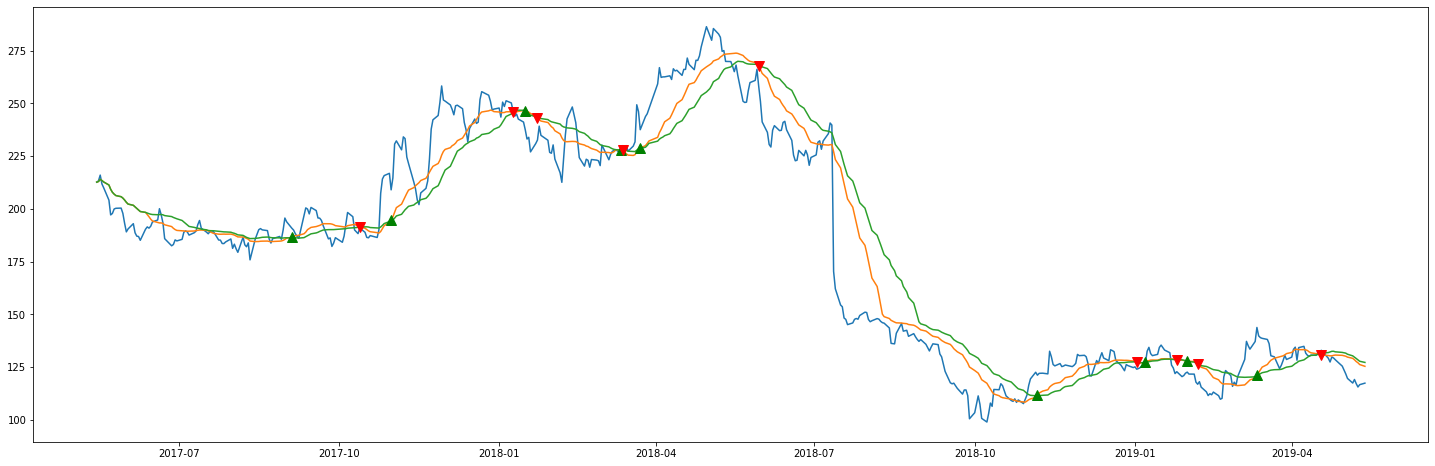

In [ ]:
plt.close()
dfp = pd.DataFrame()
dfp["Average Price"] = df2[df2["Series"] == "EQ"]["Average Price"]
dfp["Date"] = df2[df2["Series"] == "EQ"]["Date"]
dfp['Date']= pd.to_datetime(dfp['Date'])

date = pd.to_datetime(dfp['Date'])

dfp.set_index("Date", inplace = True)

dfp['21'] = dfp[["Average Price"]].rolling(21,min_periods=1).mean()
dfp['34'] = dfp[["Average Price"]].rolling(34,min_periods=1).mean()
plt.figure(figsize=(25,8))
plt.plot(dfp[["Average Price"]])
plt.plot(dfp['21'])
plt.plot(dfp['34'])

signals = pd.DataFrame(index=date)
signals['signal'] = 0
signals['signal'][21:] = np.where(dfp['21'][21:] > dfp['34'][21:], 1, 0)
signals['position'] = signals['signal'].diff().fillna(0)
signals['short_mavg'] = dfp['21'].tolist()
signals['long_mavg'] = dfp['34'].tolist()
signals.head()

plt.plot(signals.loc[signals.position == 1].index, signals['short_mavg'][signals.position == 1], '^', markersize=10, color='green', label='Buy')
plt.plot(signals.loc[signals.position == -1].index, signals['short_mavg'][signals.position == -1], 'v', markersize=10, color='red', label='Sell')

plt.show()

2.10

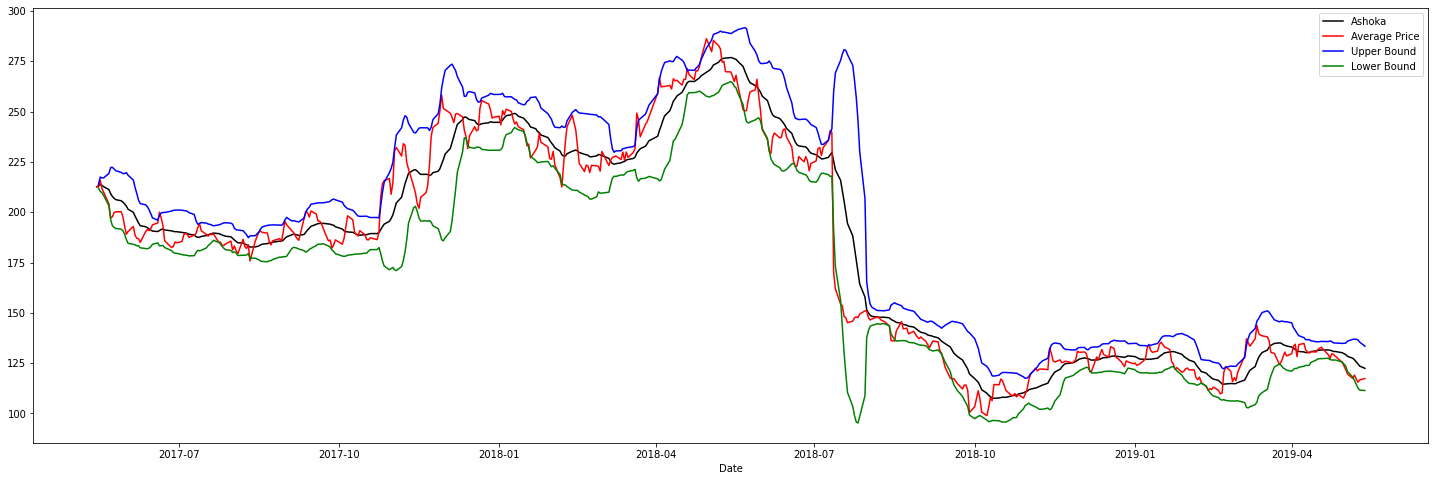

In [ ]:
ashoka_mean_14=dfp[['Average Price']].rolling(14,min_periods=1).mean()
ashoka_std_14=dfp[['Average Price']].rolling(14,min_periods=1).std()

upper = ashoka_mean_14 + 2*ashoka_std_14
lower = ashoka_mean_14 - 2*ashoka_std_14

plt.figure(figsize=(25,8))
plt.plot(ashoka_mean_14, color='black', label='Ashoka')
plt.plot(dfp[['Average Price']], color='red', label='Average Price')
plt.plot(upper, color='blue', label='Upper Bound')
plt.plot(lower, color='green', label='Lower Bound')
plt.xlabel('Date')
plt.legend()
plt.show()
plt.close()